#Resumo

- O desafio proposto trata sobre o transtorno depressivo, um problema multifatorial que pode ter várias possíveis combinações de situações como causa.

- Os dados disponíveis são resultados da NHNES (National Health and Nutrition Examination Survey), realizada anualmente nos EUA para avaliar a saúde e nutrição de adultos e crianças;

- Seu desafio é responder as seguintes perguntas:

  - Qual o perfil de indivíduos (adultos maiores de 18 anos) com sintomas depressivos nos EUA no período de 2005-2006?

  - Hábitos saudáveis de alimentação e atividade física estão associados a menores índices de depressão nesta população?



In [564]:
import pandas as pd
import numpy as np

demo_phq = pd.read_csv('/content/DEMO_PHQ.csv')
pag_hei = pd.read_csv('/content/PAG_HEI.csv')

demo_phq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5334 entries, 0 to 5333
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      5334 non-null   int64  
 1   DPQ010    4836 non-null   float64
 2   DPQ020    4836 non-null   float64
 3   DPQ030    4836 non-null   float64
 4   DPQ040    4836 non-null   float64
 5   DPQ050    4836 non-null   float64
 6   DPQ060    4836 non-null   float64
 7   DPQ070    4836 non-null   float64
 8   DPQ080    4836 non-null   float64
 9   DPQ090    4836 non-null   float64
 10  RIAGENDR  5334 non-null   int64  
 11  RIDAGEYR  5334 non-null   int64  
 12  RIDRETH1  5334 non-null   int64  
 13  DMDEDUC   5334 non-null   int64  
 14  INDFMINC  5287 non-null   float64
dtypes: float64(10), int64(5)
memory usage: 625.2 KB


In [565]:
pag_hei.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9424 entries, 0 to 9423
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SEQN                      9424 non-null   int64  
 1   PAG_MINW                  7150 non-null   float64
 2   ADHERENCE                 7150 non-null   float64
 3   HEI2015C1_TOTALVEG        8549 non-null   float64
 4   HEI2015C2_GREEN_AND_BEAN  8549 non-null   float64
 5   HEI2015C3_TOTALFRUIT      8549 non-null   float64
 6   HEI2015C4_WHOLEFRUIT      8549 non-null   float64
 7   HEI2015C5_WHOLEGRAIN      8549 non-null   float64
 8   HEI2015C6_TOTALDAIRY      8549 non-null   float64
 9   HEI2015C7_TOTPROT         8549 non-null   float64
 10  HEI2015C8_SEAPLANT_PROT   8549 non-null   float64
 11  HEI2015C9_FATTYACID       8549 non-null   float64
 12  HEI2015C10_SODIUM         8549 non-null   float64
 13  HEI2015C11_REFINEDGRAIN   8549 non-null   float64
 14  HEI2015C

In [566]:
pag_hei.head(50)

,SEQN,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
0,31128,NaN,NaN,3.083350,0.000000,3.927008,5.000000,0.000000,5.000000,4.251329,0.000000,2.487572,6.911882,10.000000,0.818029,6.408092,47.887262
1,31129,285.450346,2.0,1.697761,0.000000,3.731602,4.929186,0.527631,3.887809,4.693141,0.928562,3.740758,6.146441,7.274979,8.006457,0.000000,45.564326
2,31130,0.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,31131,264.711316,2.0,3.115103,0.000000,5.000000,1.320674,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
4,31132,1353.348730,3.0,3.509081,0.000000,5.000000,5.000000,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696
5,31133,0.000000,1.0,1.417400,0.000000,2.083333,1.317204,0.000000,3.176179,3.617204,0.470430,5.657701,5.589008,0.000000,6.473871,5.779322,35.581653
6,31134,1011.478060,3.0,2.845772,1.283933,2.629005,5.000000,2.217331,2.313900,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826
7,31136,713.625866,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,31137,1423.787529,3.0,1.516093,0.000000,0.828672,0.000000,0.676749,5.000000,3.526000,0.000000,4.379950,8.192344,7.032194,5.461700,0.000000,36.613702
9,31138,NaN,NaN,3.389396,0.000000,5.000000,5.000000,1.558511,5.000000,4.079000,0.000000,7.149274,2.288504,5.801370,7.816354,7.899627,54.982037


###realizando o tratamento das categorias 7 = “Se recusou a responder” e 9 = “Não sabe”.


In [567]:
#vendo a distribuição de valores nesta variavel 
demo_phq['INDFMINC'].value_counts()

11.0    1044
6.0      678
7.0      535
8.0      485
3.0      440
5.0      426
4.0      412
9.0      297
2.0      281
10.0     278
1.0      190
12.0      78
99.0      77
77.0      36
13.0      30
Name: INDFMINC, dtype: int64

In [568]:
#como irei utilizar replace vou reservar uma das variaveis onde os valores não batem com a alteração 
reserv = demo_phq['INDFMINC']
demo_phq.drop(['INDFMINC'], axis = 1, inplace = True)
#transformando os valores 7 e 9 que indicam que a pessoa nao quis responder ou nao sabia para nulos
demo_phq = demo_phq.replace(7.0, np.nan)
demo_phq = demo_phq.replace(9.0,np.nan)
#transformando os valores 77 e 99 da variavel reservada que tbm indicam que a pessoa nao quis responder ou nao sabia
reserv = reserv.replace (77, np.nan)
reserv = reserv.replace (99, np.nan)



In [569]:
#juntando a variavel reservada novamente com o dataset 
demo_phq = demo_phq.join(reserv,how = 'inner')


###Combinando os dois bancos e lidando com os dados faltantes

In [570]:
#juntando os dois datasets o de questionario de depressão e o questionario de habitos
#usei um innerJoin pois como o demo_phq so possui adultos é uma maneira de só puxar os adultos do pag_hei e excluir as crianças
df = demo_phq.set_index('SEQN').join(pag_hei.set_index('SEQN'), how='inner')

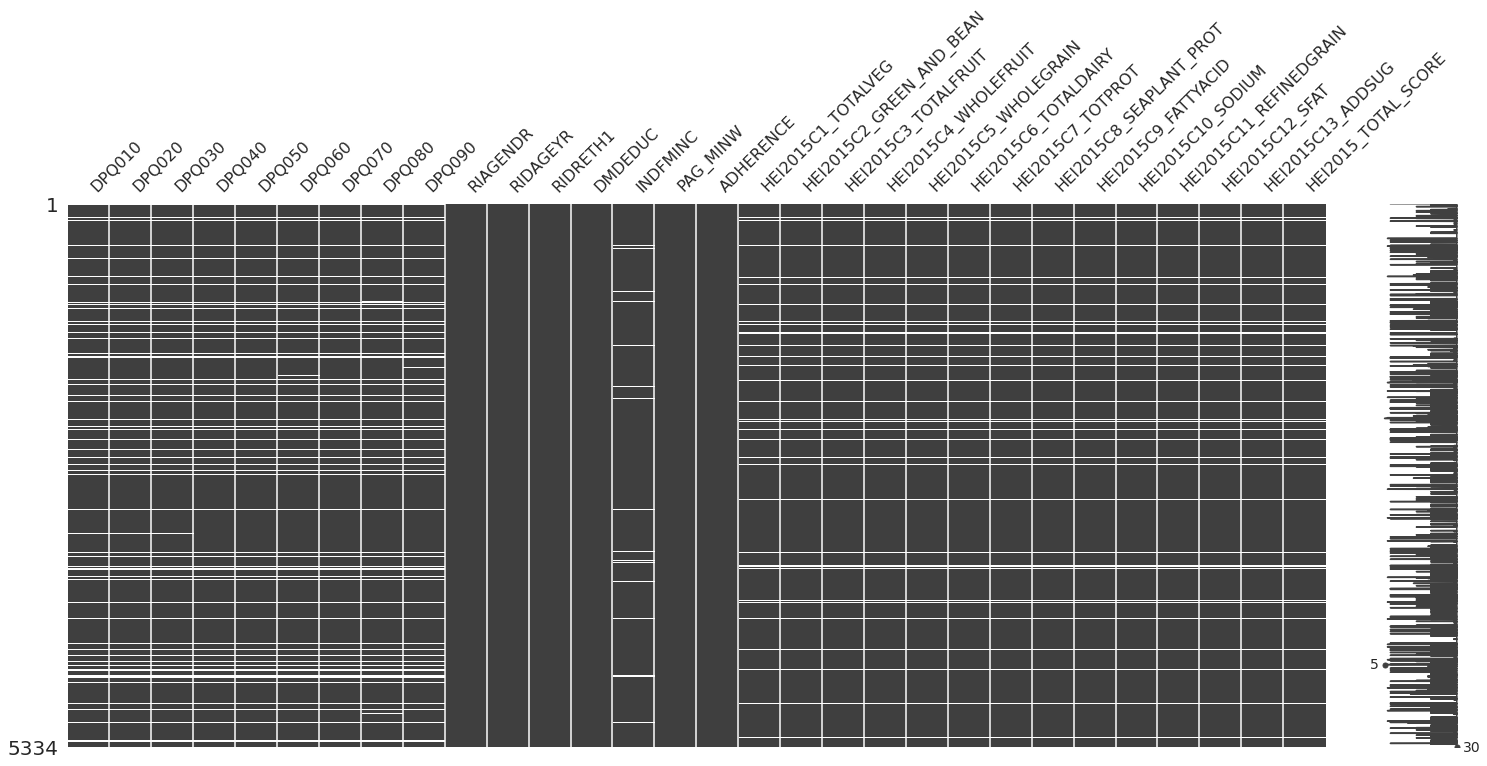

In [571]:
#visualizando os dados faltantes 
import missingno as msno
msno.matrix(df)

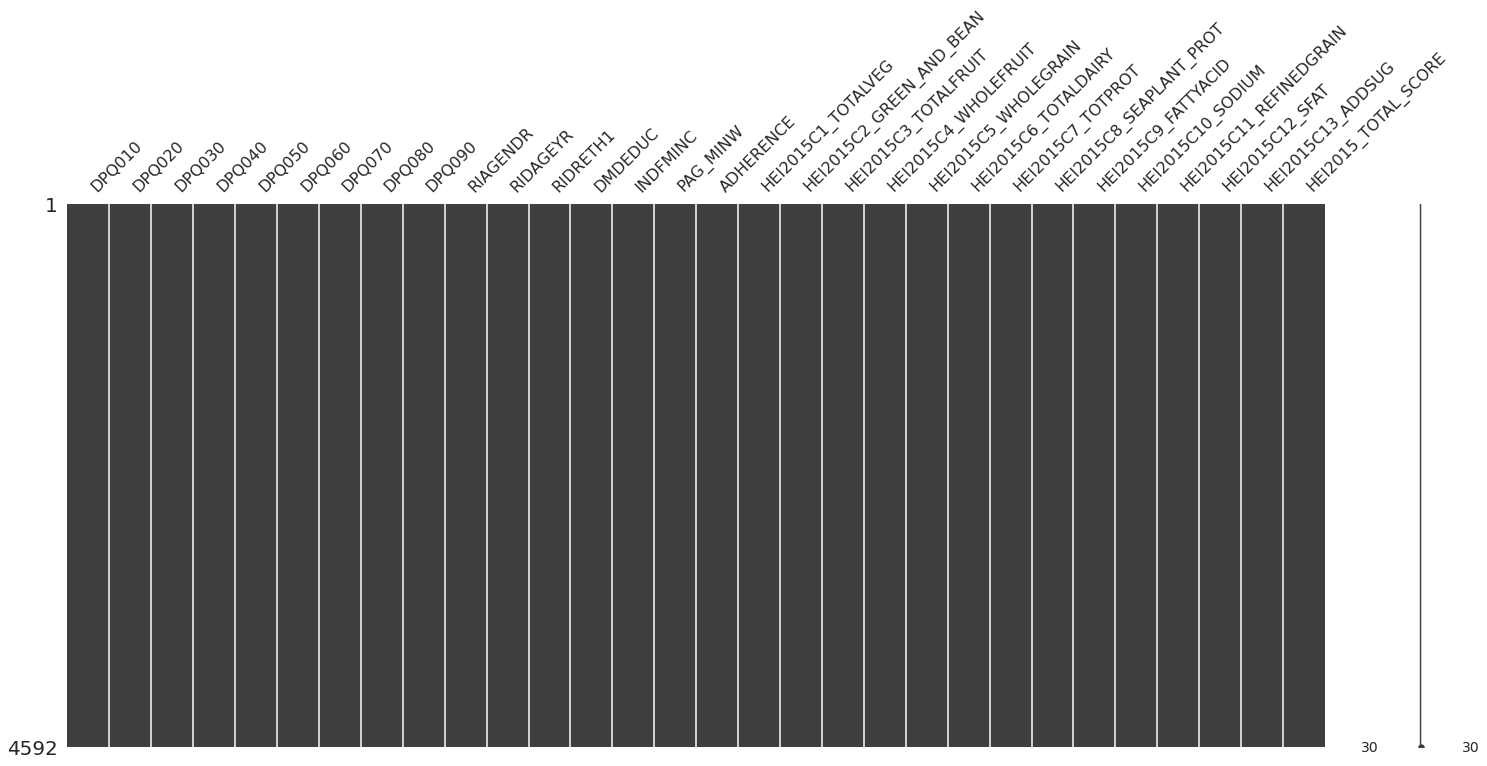

In [572]:
#apesar de possuirmos colunas onde os dados estão integros elas não representam as nossas variaveis de Maior interesse (questionario)
#ou seja os dados faltantes são em sua totalidade perguntas do questionario, onde um entrevistado aparentemente não respondeu nenhuma pergunta
#então optei por excluir todas essas linhas que possuem dados faltantes 
df = df.dropna()
msno.matrix(df)

In [573]:
df.describe()

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,...,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
count,4592.000000,4592.000000,4592.000000,4592.000000,4592.000000,4592.000000,4592.000000,4592.000000,4592.000000,4592.000000,...,4592.000000,4592.000000,4592.000000,4592.000000,4592.000000,4592.000000,4592.000000,4592.000000,4592.000000,4592.000000
mean,0.287021,0.297256,0.529181,0.700131,0.306838,0.197735,0.219294,0.129573,0.044861,1.517639,...,1.770209,3.771627,4.438221,2.580432,4.693164,4.729056,5.832311,6.020552,6.198574,49.861650
std,0.655341,0.644878,0.860834,0.864116,0.690456,0.548747,0.582578,0.448115,0.266784,0.499743,...,1.911481,1.589496,0.998381,2.169456,3.226607,3.407159,3.476475,3.183472,3.342821,12.346723
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.059212
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,2.634842,4.173354,0.000000,2.002224,1.553254,3.005503,3.642483,3.691667,40.872546
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,1.038567,4.942627,5.000000,2.547317,4.430397,4.806889,6.252825,6.349426,6.860304,49.387521
75%,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,3.398633,5.000000,5.000000,5.000000,7.224387,7.612526,9.294804,8.938588,9.403461,58.009999
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,...,5.000000,5.000000,5.000000,5.000000,10.000000,10.000000,10.000000,10.000000,10.000000,89.529383


In [574]:
df['PAG_MINW'] = np.where(df['PAG_MINW']>3600,3600, df['PAG_MINW'])
df['PAG_HW'] = df['PAG_MINW'] / 60

### Criando a variavel phq9 (score)
o score é a soma de todo questionario

In [575]:
#somando todo o questionario para ter a variavel de score 
df['phq9'] = df['DPQ010']+ df['DPQ020']+df['DPQ030']+ df['DPQ040'] +df['DPQ050']+df['DPQ060']+df['DPQ070']+df['DPQ080']+df['DPQ090']

### criar variavel phq_grp com a classificação do escore phq9

- 0 (sem sintoma)
- 1 (sintomas leves)
- 2 (sintomas moderados)
- 3 (sintomas moderadamente severos)
- 4 (sintomas severos)

In [576]:
#criando uma função e definindo as condições que desejo para a nova variavel 
def classificar(x):
  if x <5:
    return 0
  elif (x >= 5) & (x <10):
    return 1
  elif (x >=10) & (x <15):
    return 2 
  elif (x >=15) & (x <19):
    return 3
  elif x >= 20:
    return 4

#criando a nova variavel(coluna) e chamando a função criada com apply
df['phq_grp'] = df['phq9'].apply(classificar)

In [577]:
#verificando como ficou a classificação 
df['phq_grp'].value_counts()

0.0    3654
1.0     655
2.0     191
3.0      59
4.0      22
Name: phq_grp, dtype: int64

# ANÁLISE EXPLORATÓRIA (EDA) UNIVARIADA

## Identificando os tipos das Variaveis 

###Variaveis quantitativas 
```
RIDAGEYR
PAG_MINW
HEI2015C1_TOTALVEG 
HEI2015C2_GREEN_AND_BEAN
HEI2015C3_TOTALFRUIT 
HEI2015C4_WHOLEFRUIT
HEI2015C5_WHOLEGRAIN 
HEI2015C6_TOTALDAIRY
HEI2015C7_TOTPROT
HEI2015C8_SEAPLANT_PROT 
HEI2015C9_FATTYACID 
HEI2015C10_SODIUM
HEI2015C11_REFINEDGRAIN 
HEI2015C12_SFAT
HEI2015C13_ADDSUG
HEI2015_TOTAL_SCORE 
phq9
```
### Variaveis qualitativas 
```
RIAGENDR
RIDRETH1 
DMDEDUC 
INDFMINC
phq_grp
```


In [578]:
#modificando variaveis para uma visualização mais conveniente
genderMap = {1: 'Masculino',
            2: 'Feminino'}

racaMap = {1: 'Branco', 
           2: 'negro',
           3: 'Mexicano-Americano',
           4: 'Outro',
           5: 'Outro'}


escolaMap = {1: 'Menor que o 9 ano',
             2: 'do 9 ao 12 ano',
             3: 'Ensino Medio',
             4: 'Ensino superior Incompleto',
             5: 'Superior completo ou maior'}

aderenMap = {1: 'Baixo',
             2: 'Adequado',
             3: 'Acima'}

phqMap = {0: 'sem sintoma',
          1: 'sintomas leves',
          2: 'sintomas moderados',
          3: 'sintomas moderadamente severo',
          4: 'Sintoma severo'}


df['RIAGENDR']= df['RIAGENDR'].map(genderMap)
df['RIDRETH1'] = df['RIDRETH1'].map(racaMap)
df['DMDEDUC']= df['DMDEDUC'].map(escolaMap)
df['ADHERENCE']= df['ADHERENCE'].map(aderenMap)
df['phq_grp']= df['phq_grp'].map(phqMap)



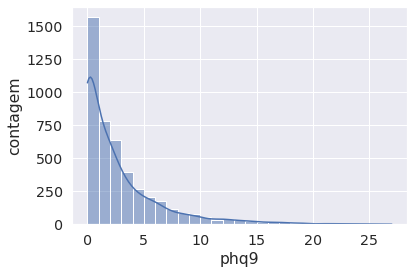

In [579]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale = 1.3)

sns.histplot(df['phq9'],
             binwidth=1,
             kde=True,
            
            ) 
plt.ylabel('contagem')
plt.show()

podemos ver que a maioria das pessoas tem um score proximo de 0 ou seja não possuem sintomas de depressão 


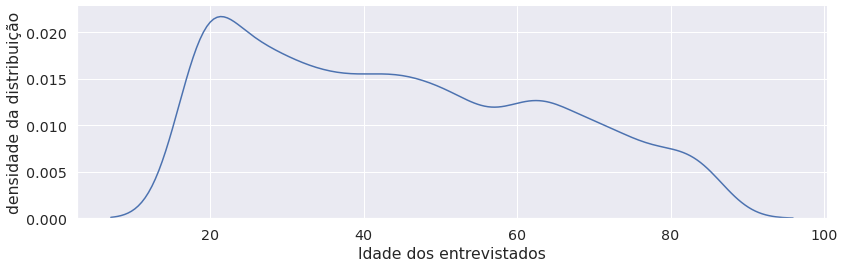

In [580]:
sns.displot(df['RIDAGEYR'],
            height = 4,
            aspect = 3,
            kind = 'kde') #distribuição continua 
plt.ylabel('densidade da distribuição')
plt.xlabel('Idade dos entrevistados')
plt.show()

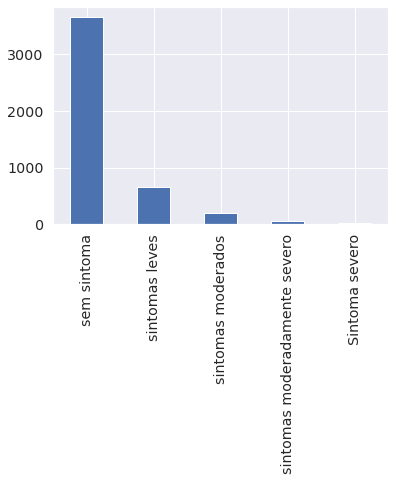

In [581]:
df["phq_grp"].value_counts().plot(kind = 'bar')

Visualizando o nivel de sintomas pela variavel de classificação 


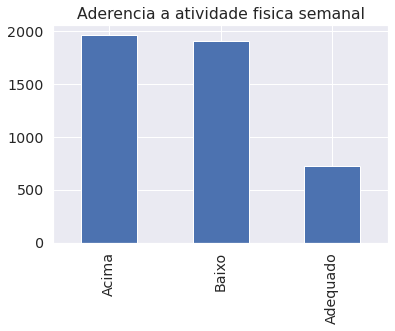

In [582]:
df["ADHERENCE"].value_counts().plot(kind = 'bar', title = 'Aderencia a atividade fisica semanal')

verificando a pratica por semana de atividade fisica 
- Baixo (< 150min/semana)
- Adequado(150-300 min/semana)
- Acima (> 300min/semana

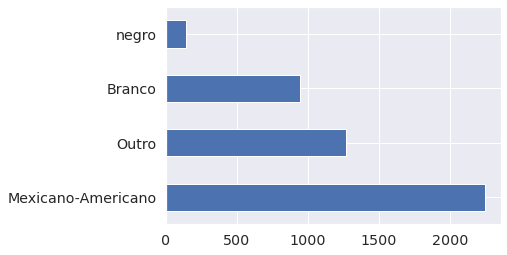

In [583]:
df["RIDRETH1"].value_counts().plot(kind = 'barh')

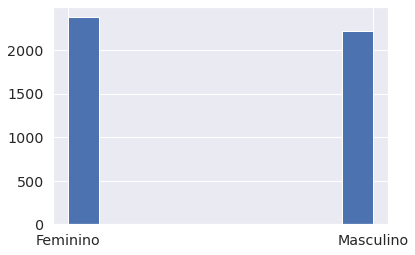

In [584]:
df['RIAGENDR'].hist()

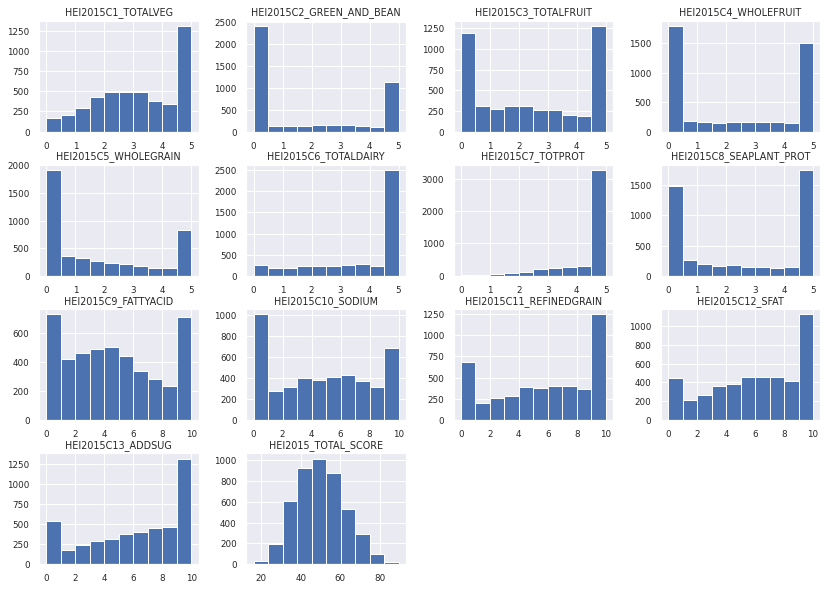

In [585]:
listaquest = ['HEI2015C1_TOTALVEG', 
                'HEI2015C2_GREEN_AND_BEAN',
                'HEI2015C3_TOTALFRUIT' ,
                'HEI2015C4_WHOLEFRUIT',
                'HEI2015C5_WHOLEGRAIN' ,
                'HEI2015C6_TOTALDAIRY',
                'HEI2015C7_TOTPROT',
                'HEI2015C8_SEAPLANT_PROT', 
                'HEI2015C9_FATTYACID', 
                'HEI2015C10_SODIUM',
                'HEI2015C11_REFINEDGRAIN', 
                'HEI2015C12_SFAT',
                'HEI2015C13_ADDSUG',
                'HEI2015_TOTAL_SCORE']

sns.set(font_scale = 0.8)
df[listaquest].hist(figsize = (14, 10));

#### Dicionario


- HEI2015C1_TOTALVEG - Total de Vegetais
- HEI2015C2_GREEN_AND_BEAN - Verduras verde escuras e leguminosas
- HEI2015C3_TOTALFRUIT - Frutas totais
- HEI2015C4_WHOLEFRUIT - Frutas in natura 
-HEI2015C5_WHOLEGRAIN - Grãos integrais 
- HEI2015C6_TOTALDAIRY- Laticínios 
- HEI2015C7_TOTPROT - Proteínas
- HEI2015C8_SEAPLANT_PROT - Plantas marinhas e proteínas vegetais
- HEI2015C9_FATTYACID - Ácido-graxo
- HEI2015C10_SODIUM Healthy - Sódio 
- HEI2015C11_REFINEDGRAIN - Grãos refinados
- HEI2015C12_SFAT - Gordura saturada
- HEI2015C13_ADDSUG - Açúcares adicionados
- HEI2015_TOTAL_SCORE - Escore total 

# ANÁLISE EXPLORATÓRIA (EDA) BIVARIADA






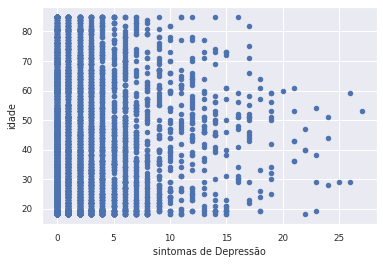

In [586]:
df.plot(x = 'phq9', y ='RIDAGEYR', kind = 'scatter')
plt.ylabel('idade')
plt.xlabel('sintomas de Depressão')
plt.show()

Nesta pesquisa são quase inexistentes sintomas severos de depressão para pessoas acima de 60 anos 

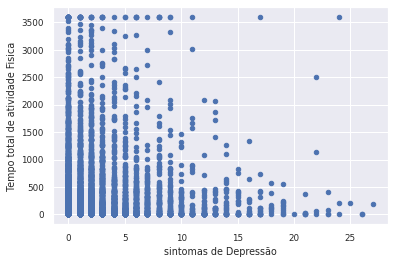

In [587]:
df.plot(x = 'phq9', y ='PAG_MINW', kind = 'scatter')
plt.ylabel('Tempo total de atividade Fisica')
plt.xlabel('sintomas de Depressão')
plt.show()

tempo total de atividade fisica Aerobica por semana 
- Aparentmente  existe uma correlação entre pessoas que praticam menos atividades fisicas e sintomas mais severos de depressão 

In [588]:
#criando uma matriz para visualizar todas as variaveis de uma so vez
listaquest = [['HEI2015C1_TOTALVEG', 'HEI2015C2_GREEN_AND_BEAN'],
              ['HEI2015C3_TOTALFRUIT' ,'HEI2015C4_WHOLEFRUIT',],
              ['HEI2015C5_WHOLEGRAIN' ,'HEI2015C6_TOTALDAIRY'],
              ['HEI2015C7_TOTPROT','HEI2015C8_SEAPLANT_PROT'], 
              ['HEI2015C9_FATTYACID','HEI2015C10_SODIUM'],
              ['HEI2015C11_REFINEDGRAIN', 'HEI2015C12_SFAT',],
              ['HEI2015C13_ADDSUG','HEI2015_TOTAL_SCORE']]

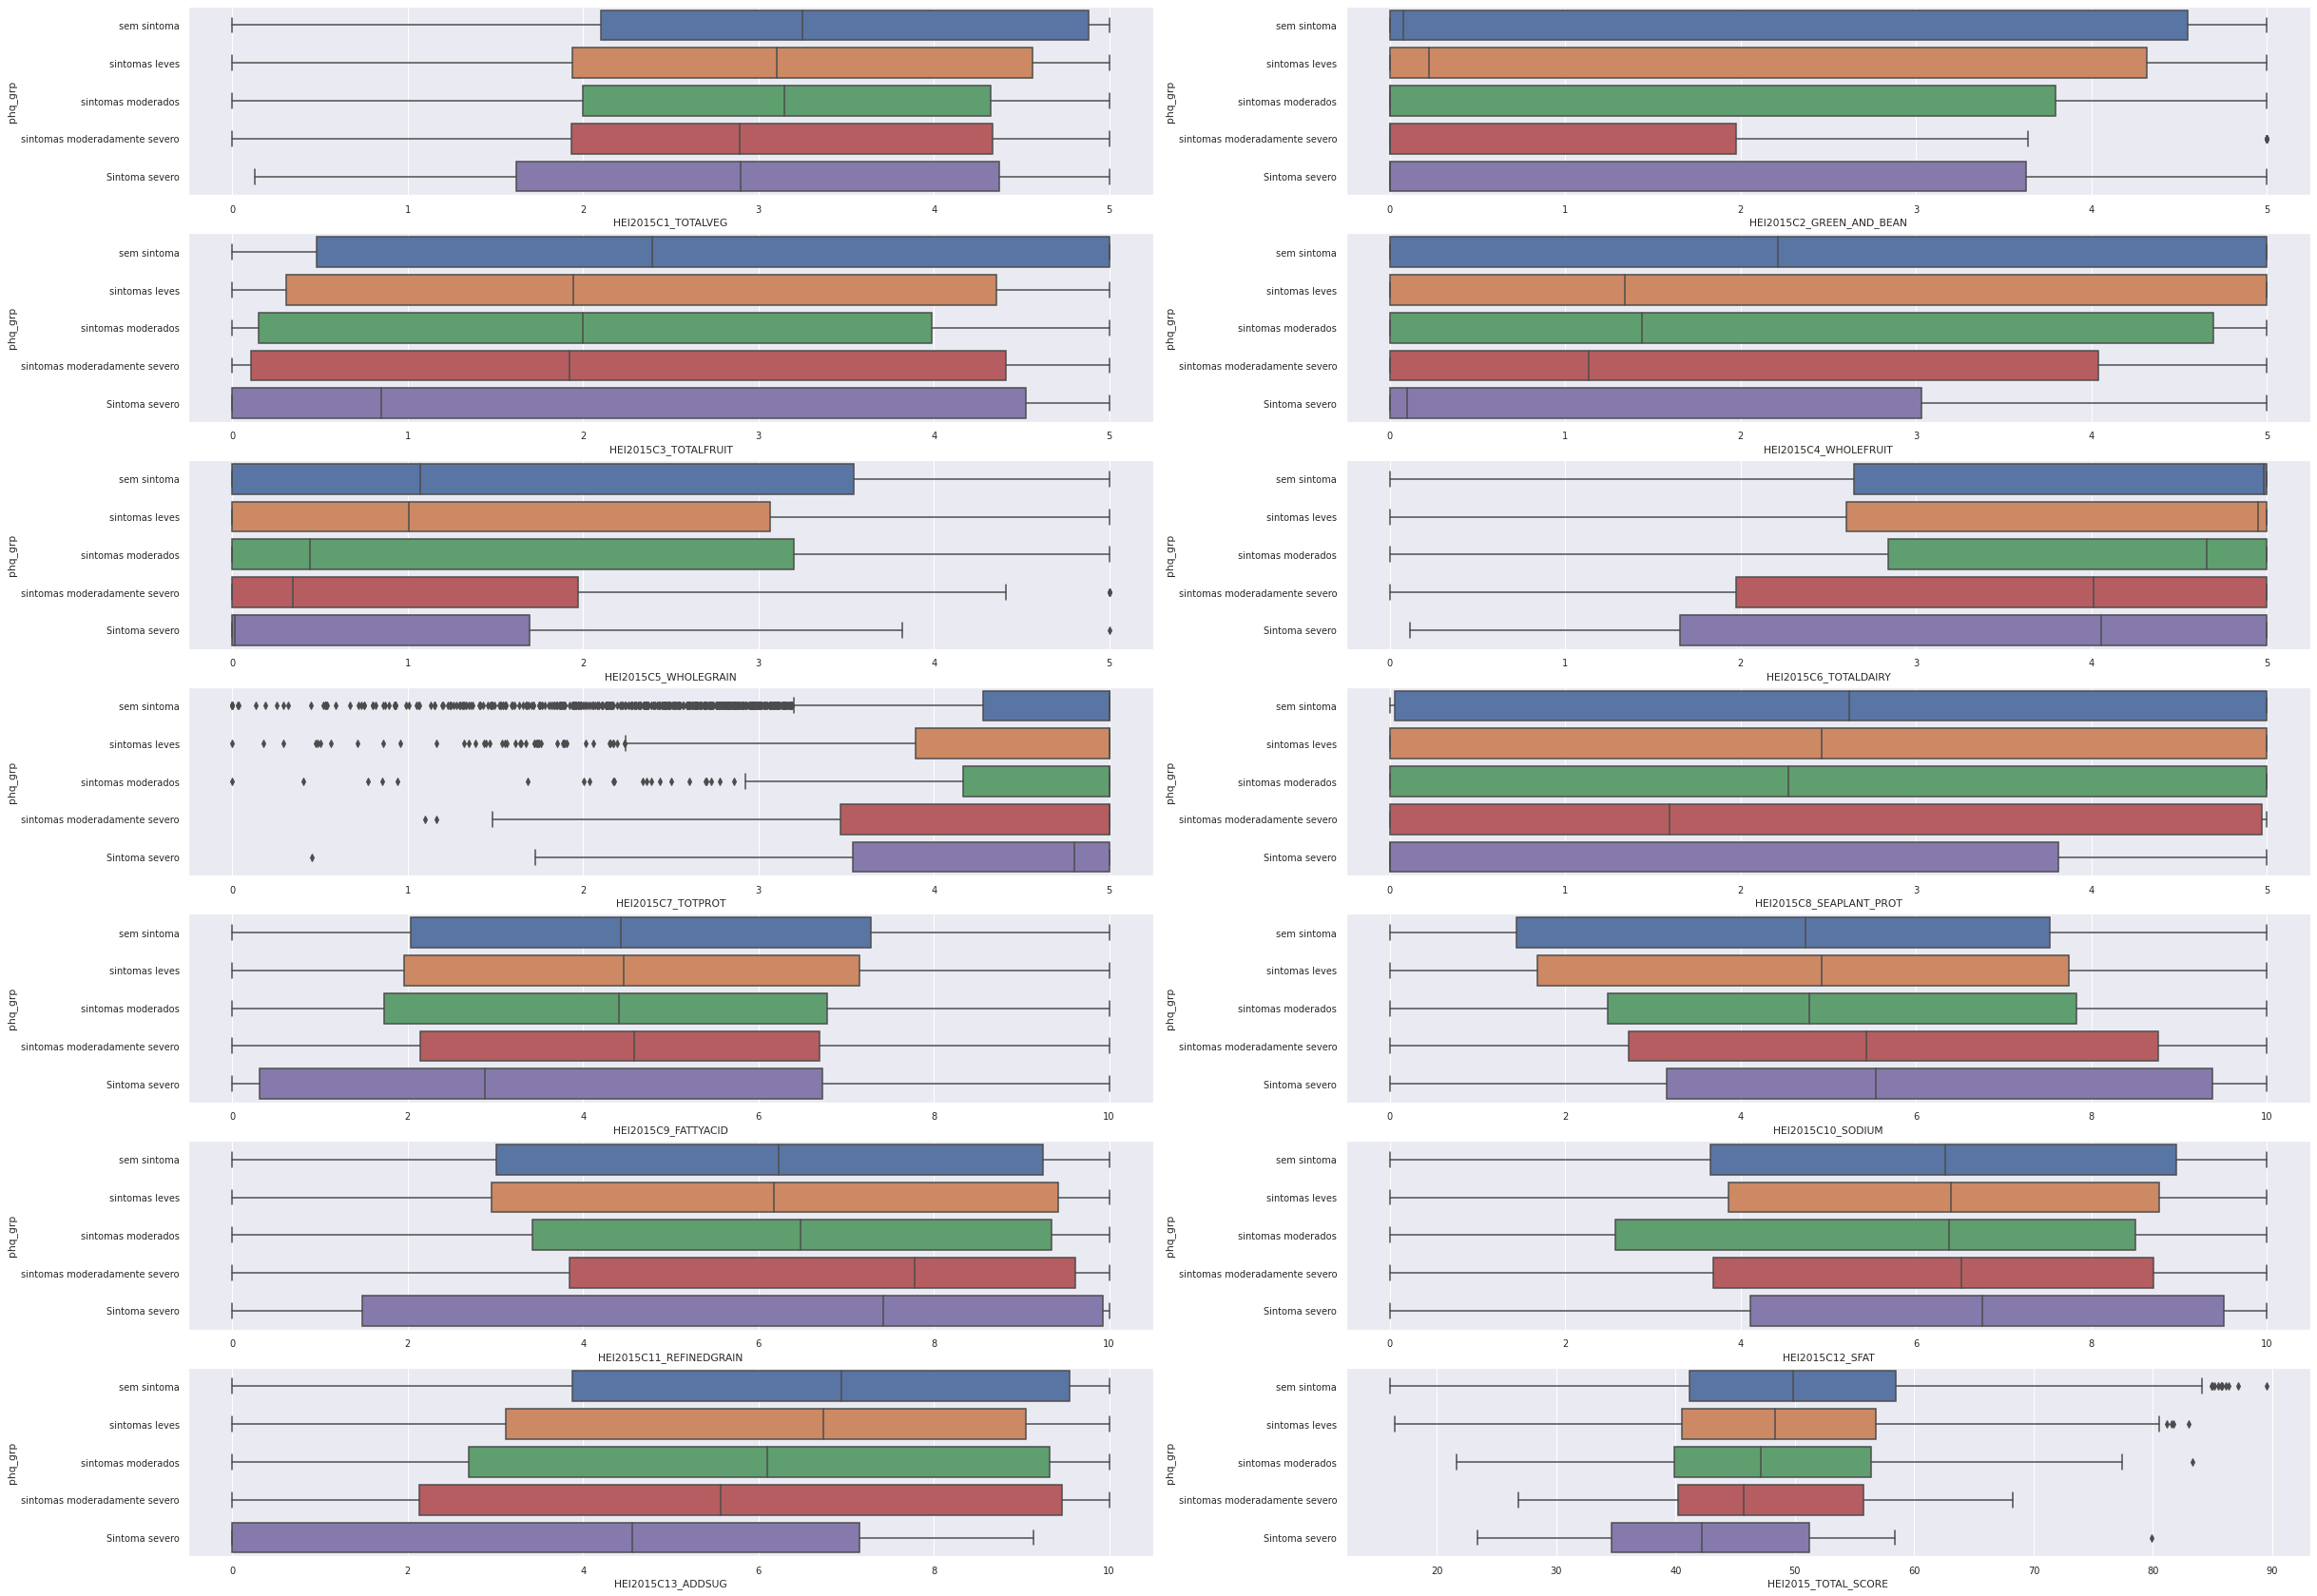

In [589]:
sns.set(font_scale=0.9)
fig, eixo = plt.subplots(7,2,figsize=(40,30)) # Criando uma matriz de 7 linhas x 2 colunas
# Para cada linha 
for linha in range(7):
    # Para cada coluna
    for coluna in range(2): 
      sns.boxplot(data=df,x=listaquest[linha][coluna],y='phq_grp',ax=eixo[linha][coluna],orient='h')

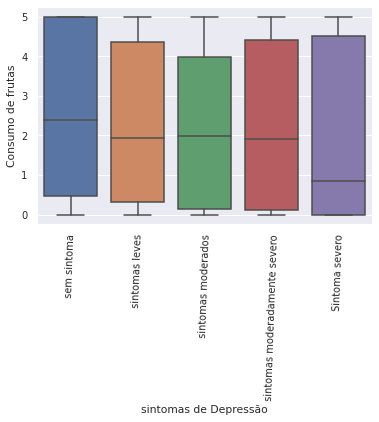

In [590]:
#visualizando a correlação da variavel Numero total de frutas consumidas com sintomas de depressão 
sns.boxplot(
    data=df, # Dataframe utilizado
    x='phq_grp', # Variável no eixo x
    y='HEI2015C3_TOTALFRUIT' # Variável no eixo y
)
plt.xlabel('sintomas de Depressão')
plt.ylabel('Consumo de frutas')
plt.xticks(rotation = 88)
plt.show()

podemos ver que existe um menor consumo de frutas conforme os casos são mais severos 

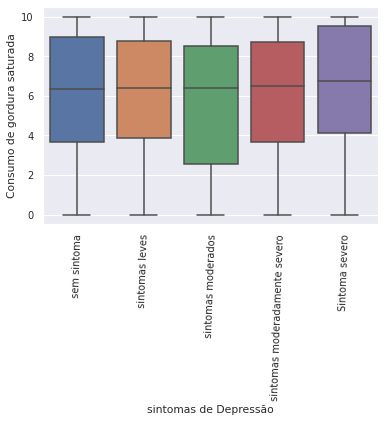

In [591]:
sns.boxplot(
    data=df, # Dataframe utilizado
    x='phq_grp', # Variável no eixo x
    y='HEI2015C12_SFAT'
)
plt.xlabel('sintomas de Depressão')
plt.ylabel('Consumo de gordura saturada')
plt.xticks(rotation = 88)
plt.show()

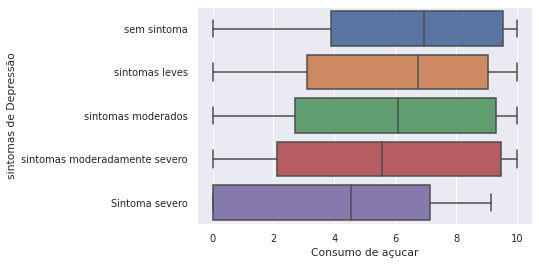

In [592]:
sns.boxplot(
    data=df, # Dataframe utilizado
    x='HEI2015C13_ADDSUG', # Variável no eixo x
    y='phq_grp', # Variável no eixo y
    orient='h'
)
plt.ylabel('sintomas de Depressão')
plt.xlabel('Consumo de açucar')
plt.show()

Pessoas com sintomas severos de depressão consomem menos açucar??


In [593]:
#deixando a variavel renda mais conveniente para se visualizar 
rendMap = {1:np.mean([0,4999]),
           2:np.mean([5000,9999]),
           3:np.mean([10000,14999]),
           4:np.mean([15000,19999]),
           5:np.mean([20000,24999]),
           6:np.mean([25000,34999]),
           7:np.mean([35000,44999]),
           8:np.mean([45000,54999]),
           9:np.mean([55000,64999]),
           10:np.mean([65000,74999]),
           11: 75000,
           12:np.mean([20000,75000]),
           13:np.mean([0,19999])}

df['INDFMINC'] = df['INDFMINC'].map(rendMap)

Text(0.5, 0, 'Sintomas de depressão')

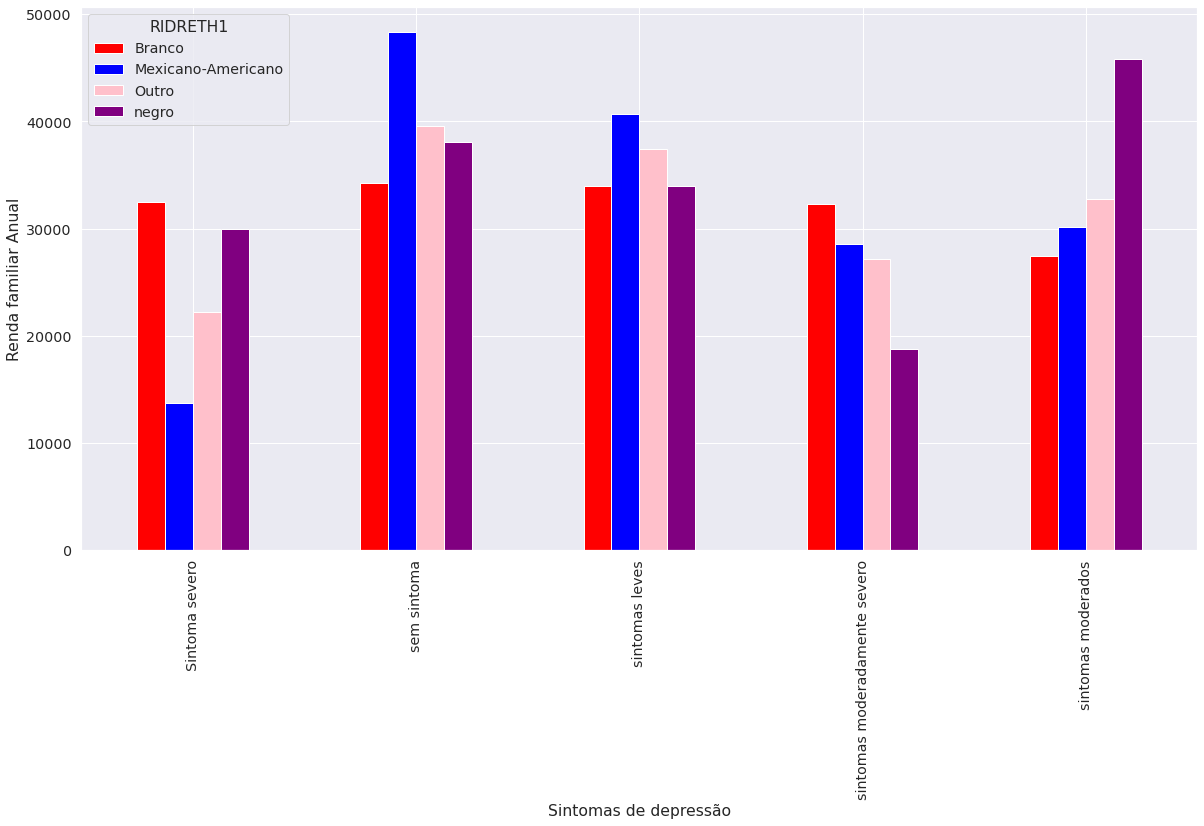

In [594]:
#visualizando os sintomas por raça e renda familiar anual
sns.set(font_scale = 1.3,)
df.groupby(['RIDRETH1', 'phq_grp']).mean()['INDFMINC'].unstack().T.plot(kind = 'bar', color = ['red', 'blue', 'pink','purple','green'],figsize=(20,10))
plt.ylabel('Renda familiar Anual')
plt.xlabel('Sintomas de depressão')

#TESTES DE HIPÓTESES
### Os grupos de depressão diferem em quanto a idade 

#### Teste ANOVA 

- h0 não a diferença entre as medias dos grupos
- h1 há pelos uma diferença

In [595]:
from scipy.stats.stats import f_oneway
import scipy.stats


df0 = df[['phq_grp','RIDAGEYR']].dropna()

stat, p = f_oneway(df0[(df0['phq_grp'] == 'sem sintoma')]['RIDAGEYR'],
                   df0[(df0['phq_grp'] == 'sintomas leves')]['RIDAGEYR'],
                   df0[(df0['phq_grp'] == 'sintomas moderados')]['RIDAGEYR'],
                   df0[(df0['phq_grp'] == 'sintomas moderadamente severo')]['RIDAGEYR'],
                   df0[(df0['phq_grp'] == 'Sintoma severo')]['RIDAGEYR'])

print('stat = %.2f p=%.2f'%(stat,p))

stat = 1.65 p=0.16


p > 0,05 ou seja não a diferença estaticamente entre os grupos de depressão quanto a media de idade  

### Correlação de Pearson

Segundo a correlação de pearson p_value > 0.05 indica que não existe correlação com a variavel Target

In [596]:
#lista das variaveis que quero avaliar com pearson 
listaquest = ['HEI2015C1_TOTALVEG', 
                'HEI2015C2_GREEN_AND_BEAN',
                'HEI2015C3_TOTALFRUIT' ,
                'HEI2015C4_WHOLEFRUIT',
                'HEI2015C5_WHOLEGRAIN' ,
                'HEI2015C6_TOTALDAIRY',
                'HEI2015C7_TOTPROT',
                'HEI2015C8_SEAPLANT_PROT', 
                'HEI2015C9_FATTYACID', 
                'HEI2015C10_SODIUM',
                'HEI2015C11_REFINEDGRAIN', 
                'HEI2015C12_SFAT',
                'HEI2015C13_ADDSUG',
                'HEI2015_TOTAL_SCORE',
                'PAG_HW']

In [598]:
from scipy import stats

X = df[listaquest] #passando a lista
y = df['phq9'] #variavel target (score)

c = pd.DataFrame([stats.pearsonr(X[col], y) for col in X.columns], #passando um for para aplicar para todas colunas 
            columns=["Corr. Pearson", "p-value"], 
            index=X.columns,
).round(4)
c

,Corr. Pearson,p-value
HEI2015C1_TOTALVEG,-0.0523,0.0004
HEI2015C2_GREEN_AND_BEAN,-0.0333,0.0239
HEI2015C3_TOTALFRUIT,-0.0527,0.0004
HEI2015C4_WHOLEFRUIT,-0.0496,0.0008
HEI2015C5_WHOLEGRAIN,-0.0507,0.0006
HEI2015C6_TOTALDAIRY,-0.0222,0.1326
HEI2015C7_TOTPROT,-0.0610,0.0000
HEI2015C8_SEAPLANT_PROT,-0.0460,0.0018
HEI2015C9_FATTYACID,-0.0240,0.1045
HEI2015C10_SODIUM,0.0345,0.0194


In [599]:
#verificando quem possui correlação 
c['p-value'] < 0.05

HEI2015C1_TOTALVEG           True
HEI2015C2_GREEN_AND_BEAN     True
HEI2015C3_TOTALFRUIT         True
HEI2015C4_WHOLEFRUIT         True
HEI2015C5_WHOLEGRAIN         True
HEI2015C6_TOTALDAIRY        False
HEI2015C7_TOTPROT            True
HEI2015C8_SEAPLANT_PROT      True
HEI2015C9_FATTYACID         False
HEI2015C10_SODIUM            True
HEI2015C11_REFINEDGRAIN     False
HEI2015C12_SFAT             False
HEI2015C13_ADDSUG            True
HEI2015_TOTAL_SCORE          True
PAG_HW                       True
Name: p-value, dtype: bool

In [605]:
#criando uma lista dos que tiveram correlação com a variavel target 
df1 = df[['HEI2015C1_TOTALVEG','HEI2015C2_GREEN_AND_BEAN','HEI2015C3_TOTALFRUIT','HEI2015C4_WHOLEFRUIT','HEI2015C5_WHOLEGRAIN','HEI2015C7_TOTPROT','HEI2015C8_SEAPLANT_PROT','HEI2015C10_SODIUM','HEI2015C13_ADDSUG']]

#pegando o valor mais presente em casos de sintomas de depressão 
df['HEI2015C1_TOTALVEG'+'_faixa'] = pd.cut(df['HEI2015C1_TOTALVEG'],bins = 5) #dividindo total vegetais em 5 faixas de valores 
agrup = df.groupby('HEI2015C1_TOTALVEG_faixa')['phq9'].agg(['count','mean','std','max'])#agrupando as faixas com o nosso score e mostrando a media de cada faixa
agrup

,count,mean,std,max
HEI2015C1_TOTALVEG_faixa,,,,
"(-0.005, 1.0]",364,3.304945,4.316396,27.0
"(1.0, 2.0]",721,2.826630,3.839366,26.0
"(2.0, 3.0]",986,2.701826,3.680424,24.0
"(3.0, 4.0]",873,2.604811,3.433954,23.0
"(4.0, 5.0]",1648,2.593447,3.688181,26.0


In [601]:
#aplicando o codigo acima para todas variaveis porem pegando a faixa com a media maior (maior sintomas de depressão)
def seleciona_faixa(dados, coluna, min_entrev = 100, faixa = 10):
  df[coluna+'_faixa']= pd.cut(df[coluna],bins=faixa) #dividndo cada coluna em faixas 
  agrupamento = df.groupby(coluna+'_faixa')['phq9'].agg(['count','mean']) #calculando a media de cada faixa 
  agrupamento.columns = ['Numero_entrevistados', 'Media_sintomas'] #renomeando as colunas de count e mean

  #criando um filtro para pegar somente faixas com 100 entrevistados
  agrupamento_filtro = agrupamento[agrupamento['Numero_entrevistados']>=min_entrev] 

  #ordenando a faixa por aquela que tem a media maior e pegando somente ela e transformando em um dataframe
  #note que reset index e para tirar a coluna_faixa do index 
  faixa_final = agrupamento_filtro.sort_values(by='Media_sintomas',ascending=False).reset_index().iloc[0].to_frame().T

  #renomeando o nome das colunas novamente 
  faixa_final.columns = ['faixa','Numero_entrevistados','Media_sintomas']

  #defindo o index com o nome da coluna 
  faixa_final['coluna'] = coluna
  faixa_final.set_index('coluna', inplace = True)

  return faixa_final

In [602]:
#testando a função 
teste = seleciona_faixa(df,'HEI2015C13_ADDSUG')
teste

,faixa,Numero_entrevistados,Media_sintomas
coluna,,,
HEI2015C13_ADDSUG,"(-0.01, 1.0]",541,3.702403


In [603]:
#aplicando a função para todas as variaveis que possuem correlação com a variavel target 
questionario2 = pd.DataFrame()
for col in df1: 
  
  questionario2 = pd.concat([questionario2,seleciona_faixa(df,col)])
questionario2


,faixa,Numero_entrevistados,Media_sintomas
coluna,,,
HEI2015C1_TOTALVEG,"(-0.005, 0.5]",163,3.920245
HEI2015C2_GREEN_AND_BEAN,"(1.5, 2.0]",125,3.072
HEI2015C3_TOTALFRUIT,"(-0.005, 0.5]",1197,2.974937
HEI2015C4_WHOLEFRUIT,"(3.0, 3.5]",165,3.060606
HEI2015C5_WHOLEGRAIN,"(3.5, 4.0]",151,3.05298
HEI2015C7_TOTPROT,"(2.0, 2.5]",130,3.253846
HEI2015C8_SEAPLANT_PROT,"(1.5, 2.0]",169,3.313609
HEI2015C10_SODIUM,"(9.0, 10.0]",684,3.089181
HEI2015C13_ADDSUG,"(-0.01, 1.0]",541,3.702403


In [604]:
#aplicando separadamente para PAG_HW por possuir um maior intervalo de valores e exigir um maior numero de faixas 
df2 = df[['PAG_HW']]
questionario3 = pd.DataFrame()
for col in df2: 
  questionario3 = pd.concat([questionario3,seleciona_faixa(df,col,faixa = 60)])
questionario3

,faixa,Numero_entrevistados,Media_sintomas
coluna,,,
PAG_HW,"(-0.06, 1.0]",1273,3.289081


Com base no teste de pearson conseguimos identificar algumas correlações com pessoas que apresentam sintomas de depressão. 
dentre as correlações encontradas identifiquei as faixas de valores que aparece com mais frequencia entre as pessoas que possuem maiores sintomas de depressão 

#### por exemplo 
- HEI2015C10_SODIUM	= (9.0, 10.0]
Dentre 0 e 10 aparece que o consumo de sodio para pessoas que apresentam sintomas de depressão esta na faixa de 9 - 10 ou seja alto consumo de sodium

- HEI2015C1_TOTALVEG = (-0.005, 0.5] dentre 0 e 5 aparece que o consumo de vegetais para pessoas que apresentam sintomas de depressão esta entre 0 e 0.5 ou seja baixo consumo de vegetais 

- PAG_HW = (-0.06,1.0) dentre 0 a 60 horas por semana pessoas com sintomas de depressão estão entre 0 e 1 hora de treino por semana ou seja baixa pratica de atividade fisica. 